In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [4]:
df = pd.read_csv('C:\\Users\\hp\\Desktop\\College\\Predictive Analysis for Manufacturing Operations\\ai4i2020.csv')

In [5]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [7]:
X = df.drop(['Machine failure','UDI','Product ID', 'Type', 'TWF','HDF','PWF','OSF','RNF'], axis=1)
y = df['Machine failure']

In [8]:
X.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,298.1,308.6,1551,42.8,0
1,298.2,308.7,1408,46.3,3
2,298.1,308.5,1498,49.4,5
3,298.2,308.6,1433,39.5,7
4,298.2,308.7,1408,40.0,9


In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
# scaler = MinMaxScaler()
# X_normalized = scaler.fit_transform(X)


trf1 = ColumnTransformer(
    transformers=[
        ('normalize', MinMaxScaler(), [0,4])
    ],
    remainder='passthrough'  
)

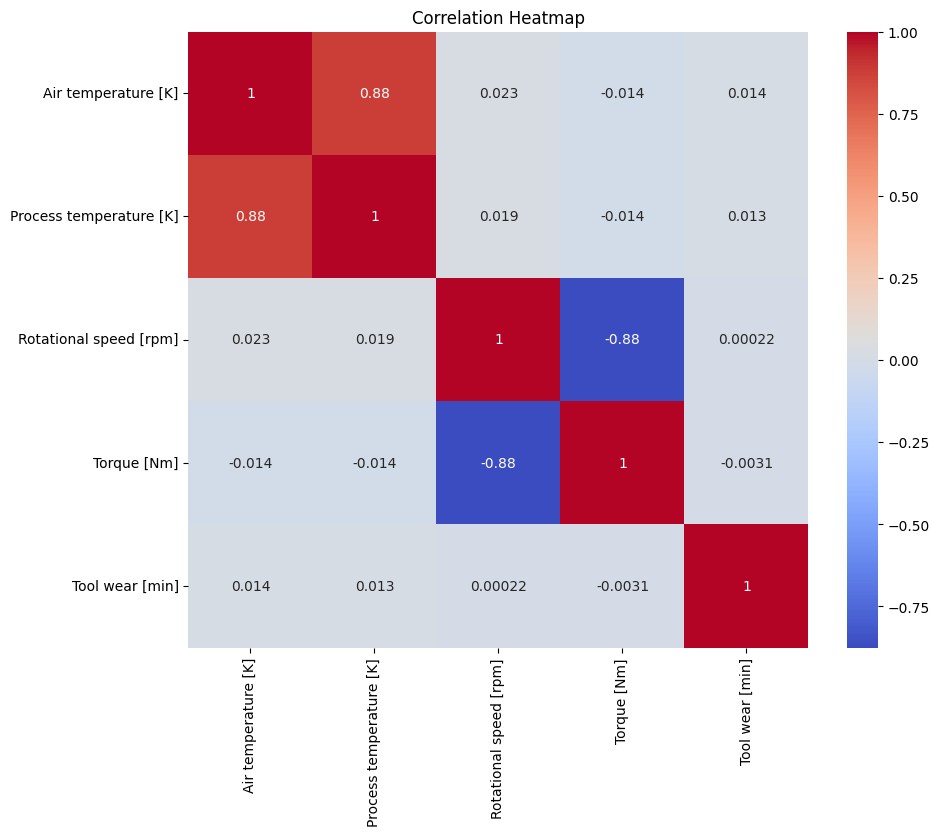

In [11]:
plt.figure(figsize=(10, 8))
correlation_matrix = X.select_dtypes(include=np.number).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [12]:
from sklearn.decomposition import PCA
trf2 = ColumnTransformer(
    transformers=[
        ('pca', PCA(n_components=1), [0,1])
    ],
    remainder='passthrough'
)


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
n_estimators = 10
base_models = []
rf = RandomForestClassifier(n_estimators=200)

In [16]:
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(trf1, trf2, RandomForestClassifier(n_estimators=200))

In [17]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('normalize', MinMaxScaler(),
                                                  [0, 4])])),
                ('columntransformer-2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pca', PCA(n_components=1),
                                                  [0, 1])])),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=200))])

In [18]:
y_pred = pipe.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)


print(f"Accuracy: {accuracy}")


Accuracy: 0.979


In [21]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))